Task 1

Get an overview over the features from each word:

In [2]:
import sys
sys.path.append('../../libs')  # Update this path according to the location of your 'dataset' module
import dataset

def print_feature_names_for_word(word):
    # Get data indices for the specified word
    data_indices = [item['id'] for item in dataset.labels()[word]]

    # Retrieve the feature names dictionary
    feature_names_dict = dataset.features_indices()

    # Assuming that each word might have unique features
    print(f"Feature names for '{word}':")
    for feature_name in feature_names_dict.keys():
        print(feature_name)

# List of words to process
words = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
         "alarm", "radio", "staubsauger", "an", "aus", 
         "brötchen", "spiegel", "wunderbar", "kann", 
         "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Execute the function for each word
for word in words:
    print_feature_names_for_word(word)
    print()  # Print a newline for better readability between words


Feature names for 'fernseher':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'heizung':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'licht':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'lüftung':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'ofen':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'alarm':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'radio':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'staubsauger':
bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr

Feature names for 'an':
ban

Try to find outliners by using two commonly used statistical methods: Z-score and the Interquartile Range (IQR):

In [6]:
import sys
import numpy as np
from scipy import stats

sys.path.append('../../libs')  # Update this path according to the location of your 'dataset' module
import dataset

# Load the full dataset
all_data = dataset.data()

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Adjusted thresholds for outlier detection
z_score_threshold = 4
iqr_multiplier = 2

# Processing each keyword
for word in keywords:
    # Load 'word' data
    word_data_indices = [item['id'] for item in dataset.labels()[word]]
    word_features = np.array([all_data[index] for index in word_data_indices])

    # Detecting outliers using Z-score
    z_scores = np.abs(stats.zscore(word_features))
    outliers_z = np.where(z_scores > z_score_threshold)
    num_outliers_z = len(np.unique(outliers_z[0]))

    # Detecting outliers using IQR
    Q1 = np.percentile(word_features, 25, axis=0)
    Q3 = np.percentile(word_features, 75, axis=0)
    IQR = Q3 - Q1
    outliers_iqr = np.where((word_features < (Q1 - iqr_multiplier * IQR)) | (word_features > (Q3 + iqr_multiplier * IQR)))
    num_outliers_iqr = len(np.unique(outliers_iqr[0]))

    # Printing results
    print(f"Word: {word}")
    print(f"Number of unique outliers detected by Z-score: {num_outliers_z}")
    print(f"Number of unique outliers detected by IQR: {num_outliers_iqr}\n")



Word: fernseher
Number of unique outliers detected by Z-score: 1495
Number of unique outliers detected by IQR: 2044

Word: heizung
Number of unique outliers detected by Z-score: 1495
Number of unique outliers detected by IQR: 2033

Word: licht
Number of unique outliers detected by Z-score: 1544
Number of unique outliers detected by IQR: 2038

Word: lüftung
Number of unique outliers detected by Z-score: 1550
Number of unique outliers detected by IQR: 2042

Word: ofen
Number of unique outliers detected by Z-score: 1526
Number of unique outliers detected by IQR: 2042

Word: alarm
Number of unique outliers detected by Z-score: 1526
Number of unique outliers detected by IQR: 2038

Word: radio
Number of unique outliers detected by Z-score: 1517
Number of unique outliers detected by IQR: 2042

Word: staubsauger
Number of unique outliers detected by Z-score: 1467
Number of unique outliers detected by IQR: 2030

Word: an
Number of unique outliers detected by Z-score: 1580
Number of unique outli

Here we use statistical analysis, specifically the standard deviation method, to determine if any feature values are significantly different from the average:

In [9]:
import sys
import numpy as np

sys.path.append('../../libs')
import dataset

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Standard deviation multiplier for outlier detection
std_dev_multiplier = 3

# Load the full dataset
all_data = dataset.data()

# Process each keyword
for word in keywords:
    # Extract data points for the word
    word_data_points = dataset.labels()[word]
    word_features = np.array([all_data[data_point['id']] for data_point in word_data_points])

    # Calculate mean and standard deviation for these features
    mean_features = np.mean(word_features, axis=0)
    std_dev_features = np.std(word_features, axis=0)

    # Outlier detection for each statistic in each feature
    print(f"Analyzing word: {word}")
    for i, feature_name in enumerate(feature_names):
        for j in range(mean_features.shape[1]):
            mean_val = mean_features[i][j]
            std_dev_val = std_dev_features[i][j]
            upper_bound = mean_val + (std_dev_multiplier * std_dev_val)
            lower_bound = mean_val - (std_dev_multiplier * std_dev_val)

            # Check if the mean for this statistic of the feature is an outlier
            if mean_val > upper_bound or mean_val < lower_bound:
                print(f"Potential outlier detected in feature '{feature_name}', statistic index {j}")


Analyzing word: fernseher
Analyzing word: heizung
Analyzing word: licht
Analyzing word: lüftung
Analyzing word: ofen
Analyzing word: alarm
Analyzing word: radio
Analyzing word: staubsauger
Analyzing word: an
Analyzing word: aus
Analyzing word: brötchen
Analyzing word: spiegel
Analyzing word: wunderbar
Analyzing word: kann
Analyzing word: haus
Analyzing word: nicht
Analyzing word: warm
Analyzing word: offen
Analyzing word: leitung
Analyzing word: schraube


We try to detect outliers by identifying recordings where feature values exceed a certain amount their median, indicating significantly atypical audio characteristics:

In [11]:
import sys
import numpy as np

sys.path.append('../../libs')
import dataset

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Load the full dataset
all_data = dataset.data()

# Adjust the outlier multiplier to be less sensitive
outlier_multiplier = 20  # Increased from 10 to 20

# Process each keyword
for word in keywords:
    # Extract data points for the word
    word_data_points = dataset.labels()[word]
    word_features = np.array([all_data[data_point['id']] for data_point in word_data_points])

    # Calculate the median for these features
    median_features = np.median(word_features, axis=0)

    # Identify outliers
    for i, feature_name in enumerate(feature_names):
        outlier_threshold = outlier_multiplier * median_features[i]
        
        # Find recordings where feature value is greater than the threshold
        outlier_indices = np.where(word_features[:, i] > outlier_threshold)[0]
        if len(outlier_indices) > 0:
            print(f"Outliers detected in feature '{feature_name}' for word '{word}'. Recording indices: {outlier_indices}")



Outliers detected in feature 'mfcc_d2' for word 'fernseher'. Recording indices: [   0    0    0 ... 2041 2041 2041]
Outliers detected in feature 'power' for word 'fernseher'. Recording indices: [   0    0    0 ... 2042 2044 2045]
Outliers detected in feature 'yin' for word 'fernseher'. Recording indices: [   0    0    0 ... 2041 2041 2041]
Outliers detected in feature 'mfcc_d2' for word 'heizung'. Recording indices: [   4    4    6 ... 2014 2030 2031]
Outliers detected in feature 'power' for word 'heizung'. Recording indices: [   0    0    1 ... 2027 2027 2031]
Outliers detected in feature 'yin' for word 'heizung'. Recording indices: [   4    4    4 ... 2028 2030 2031]
Outliers detected in feature 'mfcc_d2' for word 'licht'. Recording indices: [  15   15   16   16   17   17   17   17   17   17   18   19   48   52
   52   52   52   52   52   52   52   52   52   53   53   53   53   53
   53   53   55   55   55   55   55   55   55   55   55   55  100  100
  100  100  100  100  101  101  1

Outliers detected in feature 'mfcc_d2' for word 'ofen'. Recording indices: [   6   12   12 ... 2037 2038 2039]
Outliers detected in feature 'power' for word 'ofen'. Recording indices: [   5    5    6 ... 2043 2043 2043]
Outliers detected in feature 'yin' for word 'ofen'. Recording indices: [   6    6    6 ... 2037 2038 2038]
Outliers detected in feature 'mfcc_d2' for word 'alarm'. Recording indices: [  10   10   10 ... 2037 2037 2037]
Outliers detected in feature 'power' for word 'alarm'. Recording indices: [   2    3    3 ... 2040 2040 2040]
Outliers detected in feature 'yin' for word 'alarm'. Recording indices: [  10   10   10 ... 2037 2037 2040]
Outliers detected in feature 'mfcc_d2' for word 'radio'. Recording indices: [  16   40   40 ... 2041 2041 2041]
Outliers detected in feature 'power' for word 'radio'. Recording indices: [   0    2    8 ... 2041 2041 2041]
Outliers detected in feature 'yin' for word 'radio'. Recording indices: [   6   15   16 ... 2041 2041 2041]
Outliers dete

Outliers detected in feature 'mfcc_d2' for word 'wunderbar'. Recording indices: [  16   16   16 ... 2035 2036 2036]
Outliers detected in feature 'power' for word 'wunderbar'. Recording indices: [   0    0    2 ... 2041 2041 2041]
Outliers detected in feature 'yin' for word 'wunderbar'. Recording indices: [  16   16   16 ... 2034 2035 2036]
Outliers detected in feature 'mfcc_d2' for word 'kann'. Recording indices: [   4    7   10   32   32   40   48   50   52   53   54   55   55   55
   55   57   62   84   84   85   85   85  100  102  103  103  108  109
  109  109  109  109  110  110  110  110  110  111  124  132  134  149
  180  181  181  182  183  190  191  191  191  191  197  209  209  209
  212  213  213  213  213  213  213  214  215  215  215  215  215  215
  216  217  217  218  218  219  232  233  233  233  236  236  236  238
  244  281  281  281  281  283  284  286  287  297  318  319  319  319
  321  321  331  332  332  333  333  333  334  337  352  352  367  367
  367  367  367

Outliers detected in feature 'mfcc_d2' for word 'warm'. Recording indices: [  52   53   53   53   53   53   53   53   54   54   54   54   54   55
   56   56   56   56   56   56   57   77   77   77   83   83   89   89
   90   90   90  109  125  126  127  127  127  140  140  145  145  145
  162  162  162  162  162  162  162  162  162  163  163  163  163  163
  163  163  163  166  174  174  174  174  174  174  174  174  174  174
  175  175  175  175  175  175  175  175  178  178  178  179  179  180
  181  181  181  197  197  197  197  197  199  208  208  208  208  208
  208  215  215  216  216  216  216  216  235  235  235  235  235  236
  236  236  236  236  236  236  236  238  256  256  261  261  263  280
  280  280  280  283  283  292  298  305  305  306  306  312  312  313
  313  313  313  314  314  318  321  330  331  362  363  363  364  364
  364  366  366  366  366  366  372  372  372  373  404  405  405  405
  405  405  405  405  406  406  407  407  407  407  407  425  425  425
  

we try to detect recordings that are complete silence or relatively quiet by analyzing RMS energy levels compared to a defined threshold, and counts such occurrences in a dataset of specified keywords:

In [7]:
import sys
import numpy as np
import librosa

sys.path.append('../../libs')
import dataset

def is_silence(audio_array):
    return np.all(audio_array == 0)

def calculate_rms_energy(audio_array):
    return np.sqrt(np.mean(audio_array**2))

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Load the full dataset
all_data = dataset.data()

# Define a threshold for considering a recording as 'quiet'
quiet_threshold_factor = 0.5

# Counter for quiet recordings
quiet_recordings_count = 0

# Process each keyword
for word in keywords:
    word_data_points = dataset.labels()[word]
    word_features = np.array([all_data[data_point['id']] for data_point in word_data_points])

    # Calculate RMS energies
    rms_energies = np.array([calculate_rms_energy(features) for features in word_features])

    # Calculate average RMS energy
    avg_rms_energy = np.mean(rms_energies)

    # Threshold for quiet recordings
    quiet_threshold = avg_rms_energy * quiet_threshold_factor

    # Check each recording
    for idx, energy in enumerate(rms_energies):
        if is_silence(word_features[idx]):
            print(f"Recording {idx} of word '{word}' is complete silence.")
        elif energy < quiet_threshold:
            print(f"Recording {idx} of word '{word}' is relatively quiet.")
            quiet_recordings_count += 1

# Completion message
print("Processing complete.")

# Print the count of quiet recordings
print(f"Total number of relatively quiet recordings: {quiet_recordings_count}")


Recording 191 of word 'fernseher' is relatively quiet.
Recording 400 of word 'fernseher' is relatively quiet.
Recording 625 of word 'fernseher' is relatively quiet.
Recording 626 of word 'fernseher' is relatively quiet.
Recording 809 of word 'fernseher' is relatively quiet.
Recording 1416 of word 'fernseher' is relatively quiet.
Recording 1417 of word 'fernseher' is relatively quiet.
Recording 619 of word 'heizung' is relatively quiet.
Recording 1127 of word 'heizung' is relatively quiet.
Recording 1292 of word 'licht' is relatively quiet.
Recording 1413 of word 'licht' is relatively quiet.
Recording 192 of word 'lüftung' is relatively quiet.
Recording 193 of word 'lüftung' is relatively quiet.
Recording 440 of word 'lüftung' is relatively quiet.
Recording 442 of word 'lüftung' is relatively quiet.
Recording 626 of word 'lüftung' is relatively quiet.
Recording 808 of word 'lüftung' is relatively quiet.
Recording 809 of word 'lüftung' is relatively quiet.
Recording 1133 of word 'lüftung

Recording 192 of word 'nicht' is relatively quiet.
Recording 194 of word 'nicht' is relatively quiet.
Recording 195 of word 'nicht' is relatively quiet.
Recording 624 of word 'nicht' is relatively quiet.
Recording 806 of word 'nicht' is relatively quiet.
Recording 807 of word 'nicht' is relatively quiet.
Recording 1771 of word 'nicht' is relatively quiet.
Recording 66 of word 'warm' is relatively quiet.
Recording 67 of word 'warm' is relatively quiet.
Recording 194 of word 'warm' is relatively quiet.
Recording 195 of word 'warm' is relatively quiet.
Recording 197 of word 'warm' is relatively quiet.
Recording 227 of word 'warm' is relatively quiet.
Recording 276 of word 'warm' is relatively quiet.
Recording 277 of word 'warm' is relatively quiet.
Recording 278 of word 'warm' is relatively quiet.
Recording 279 of word 'warm' is relatively quiet.
Recording 313 of word 'warm' is relatively quiet.
Recording 314 of word 'warm' is relatively quiet.
Recording 436 of word 'warm' is relatively q

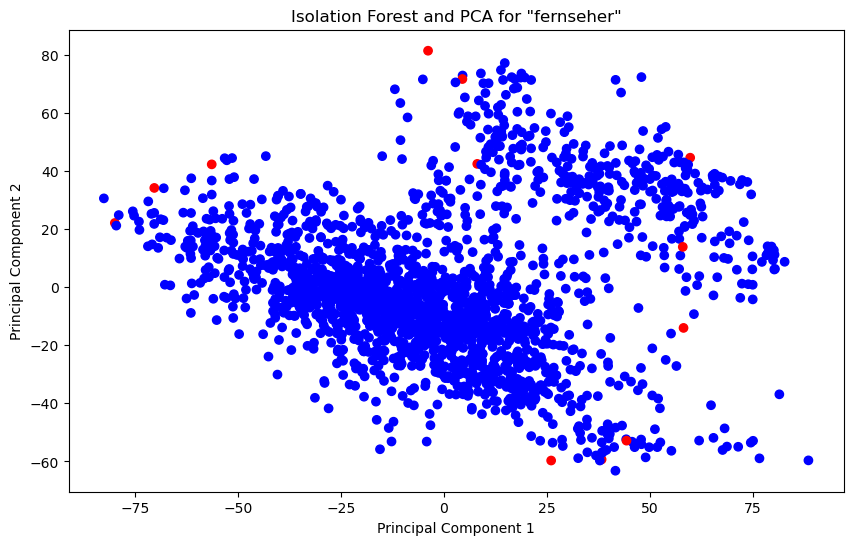

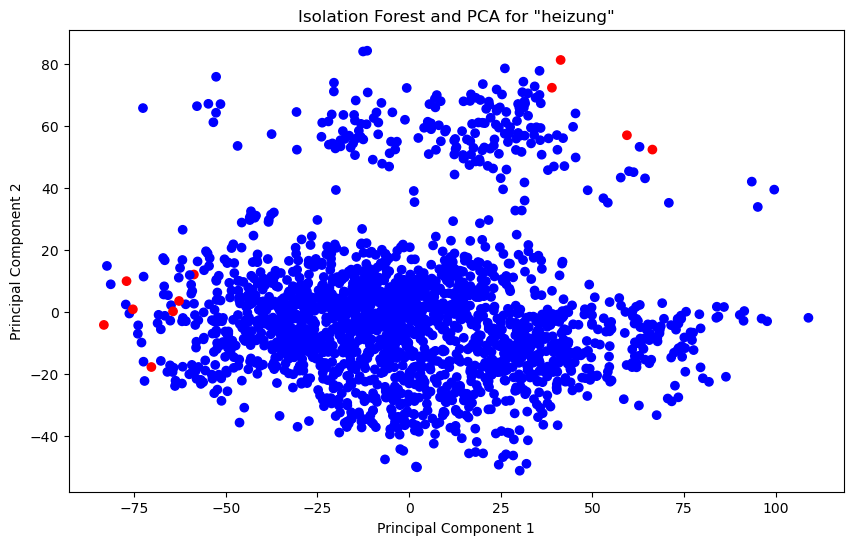

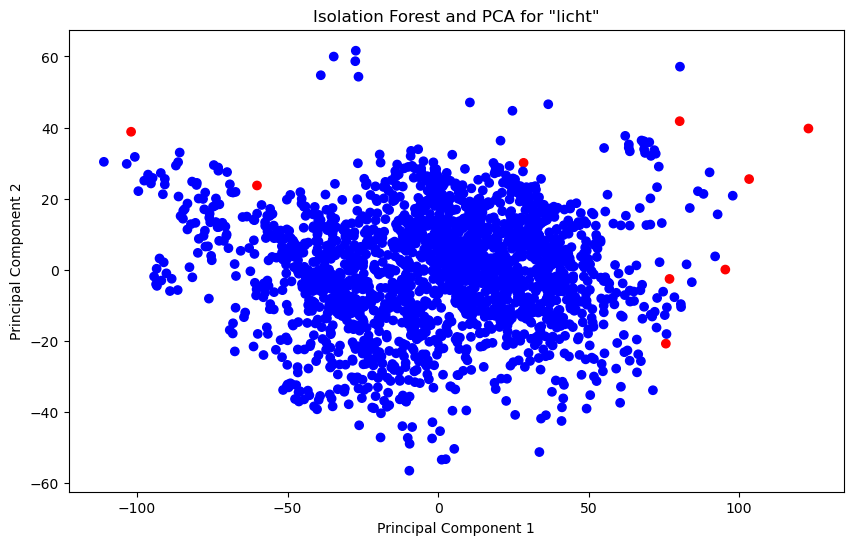

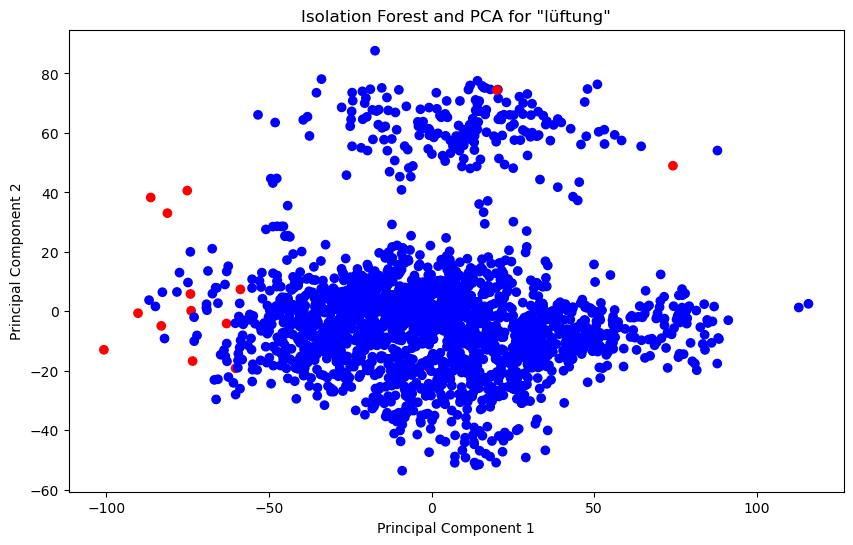

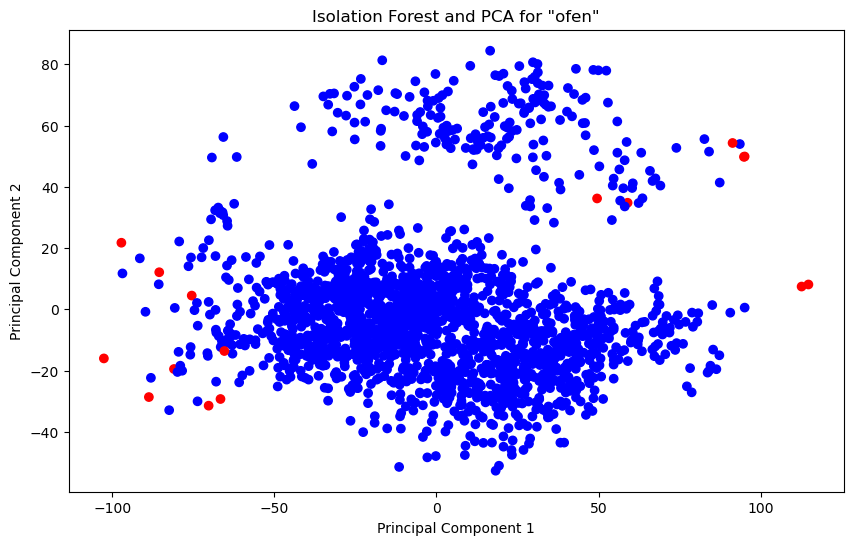

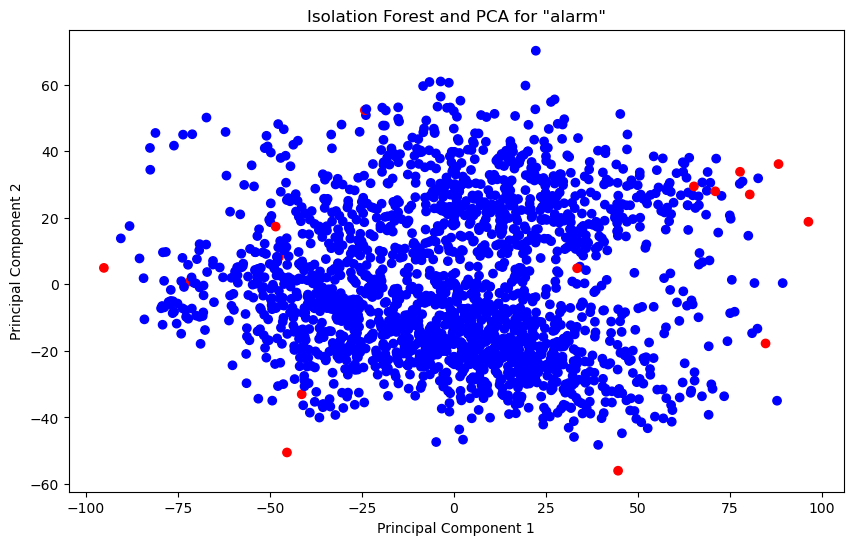

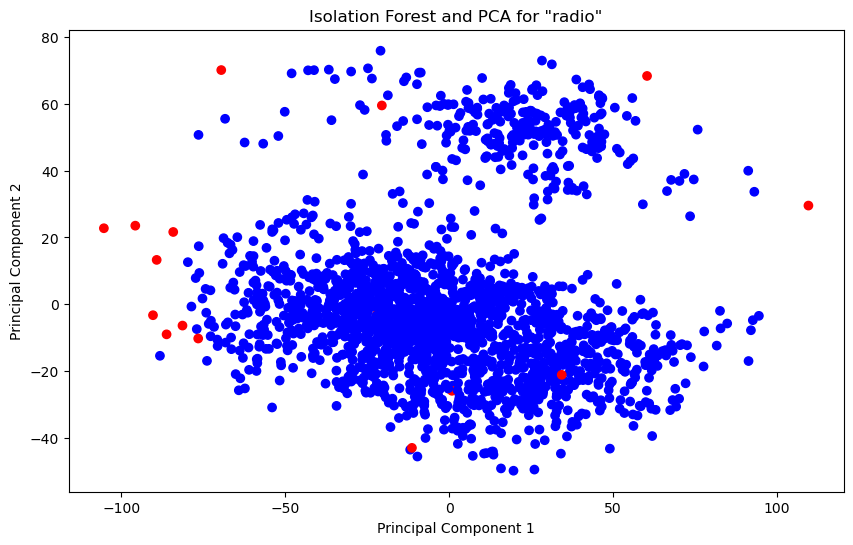

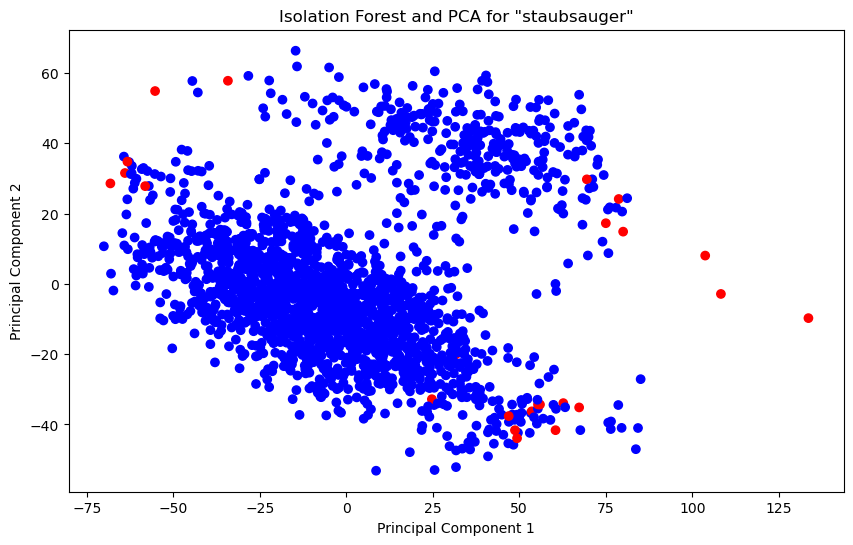

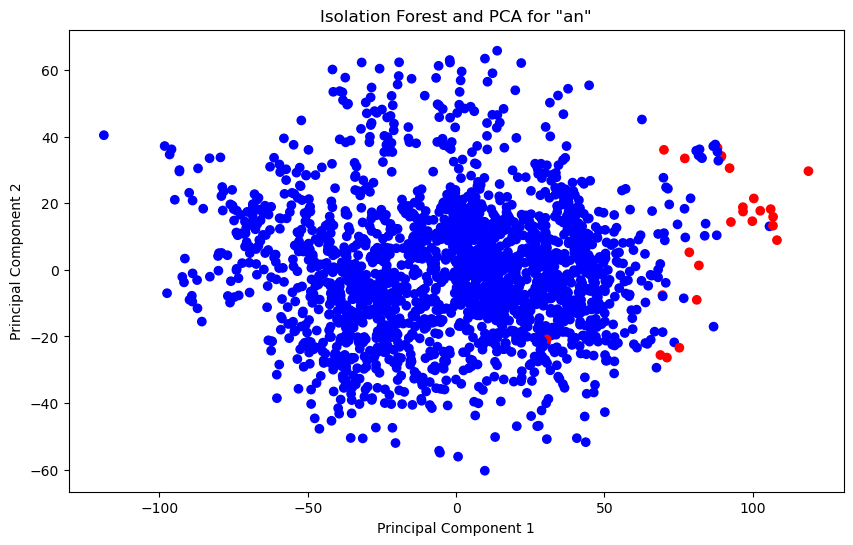

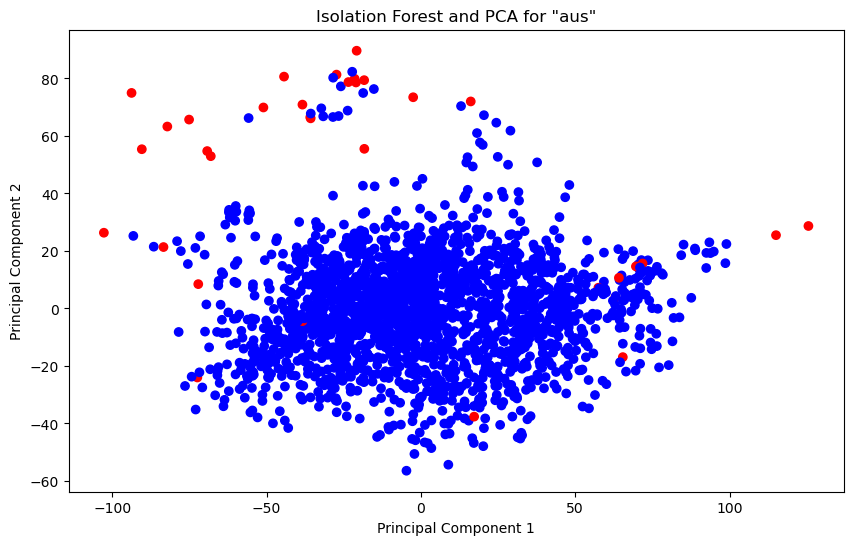

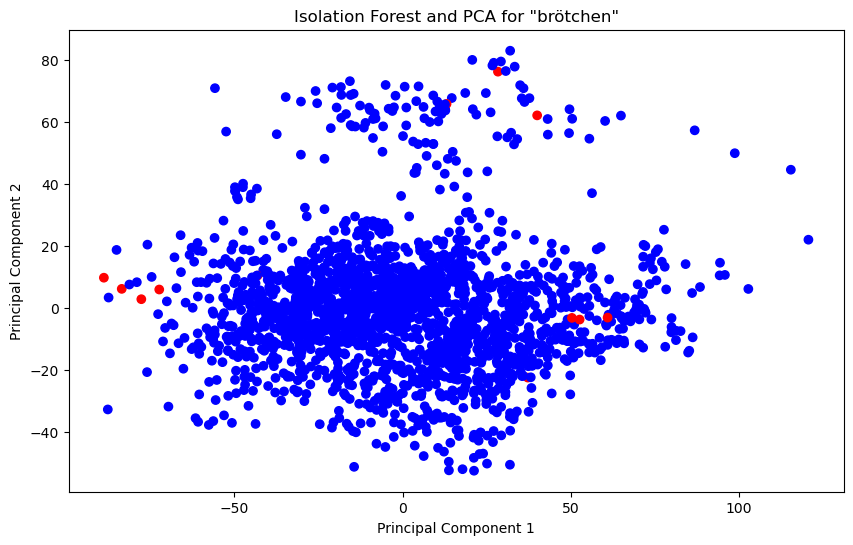

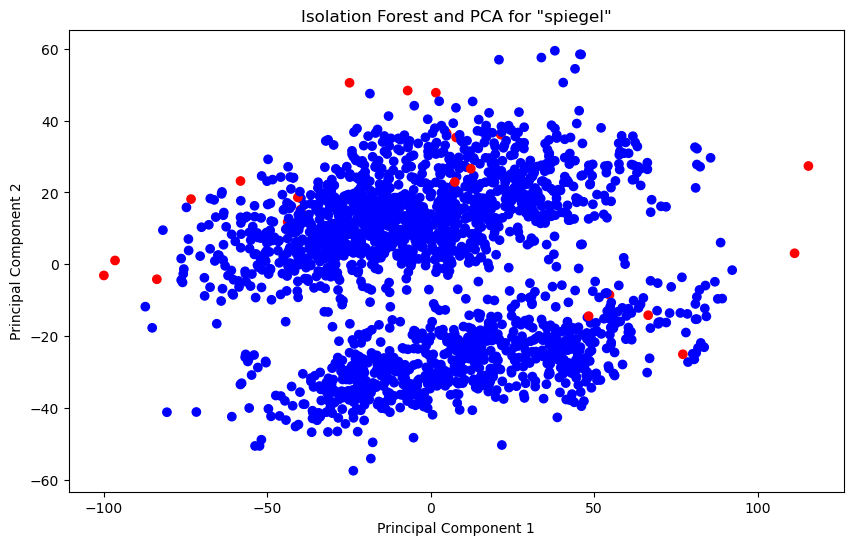

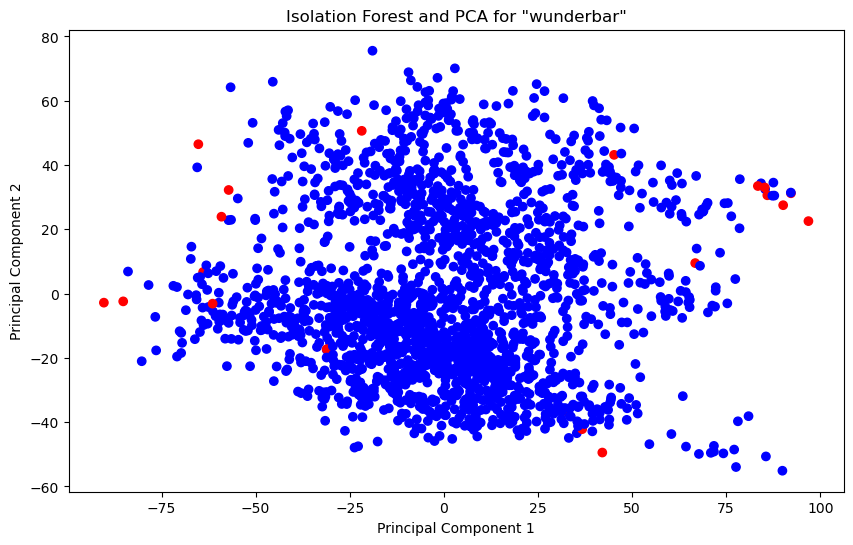

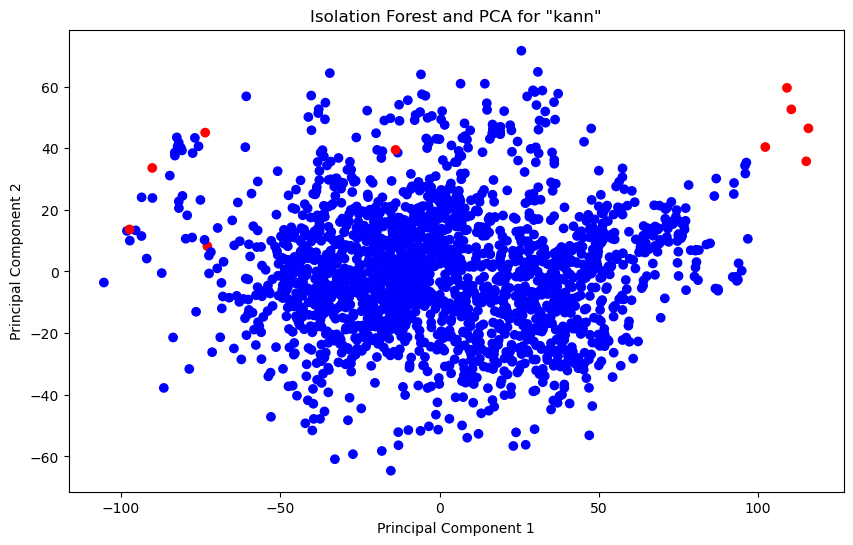

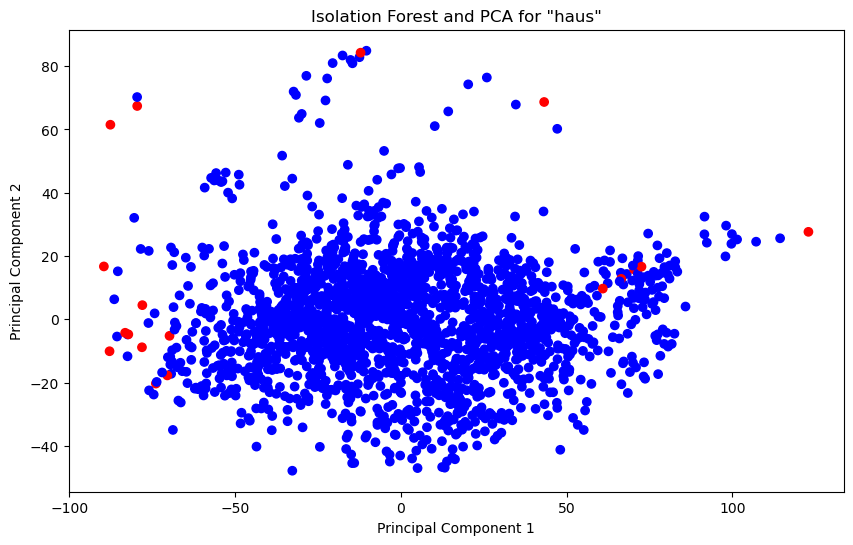

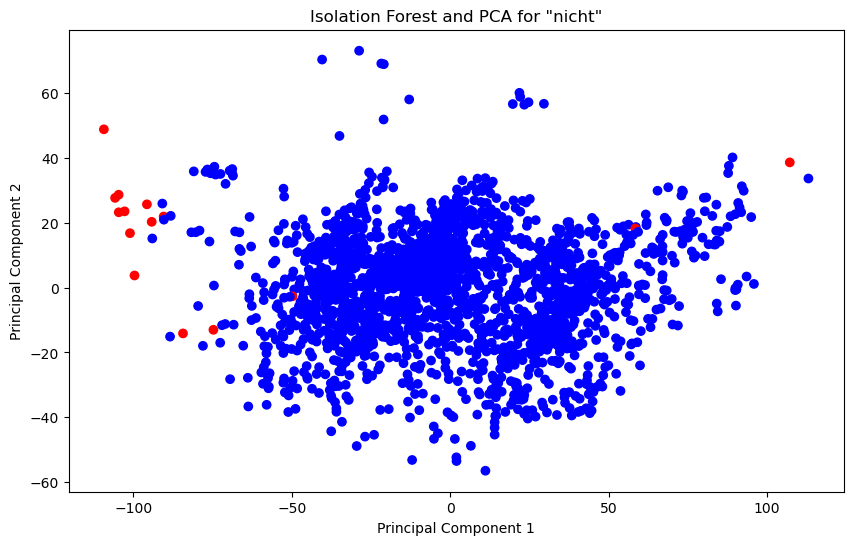

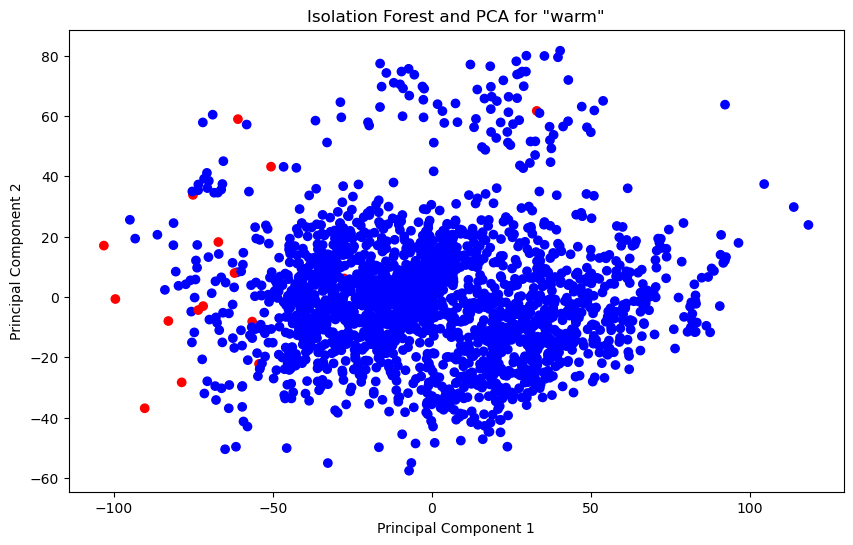

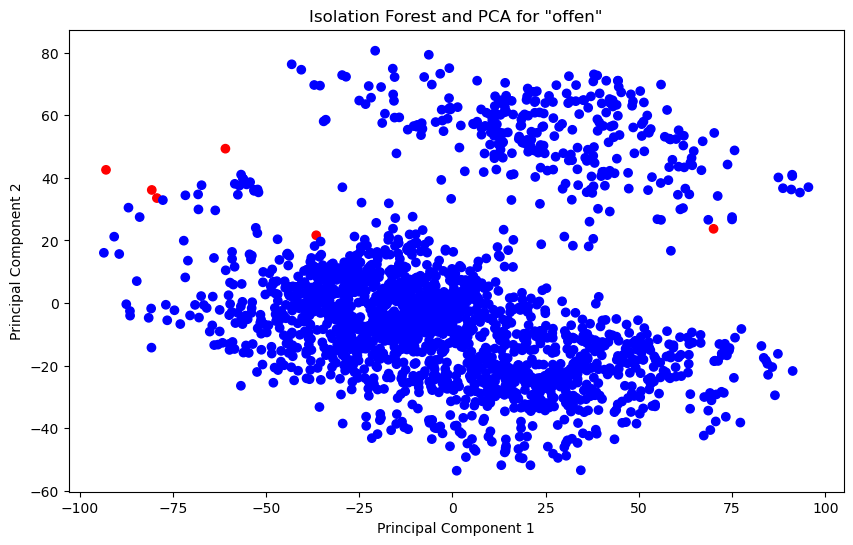

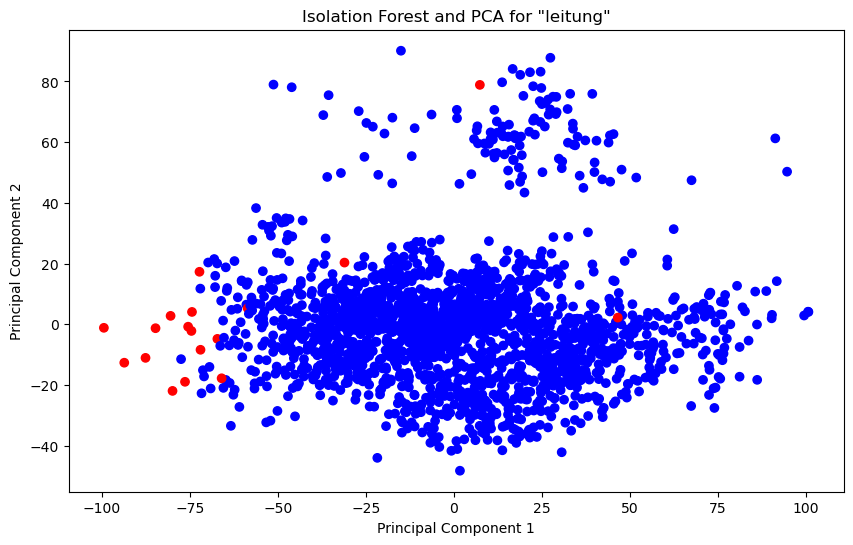

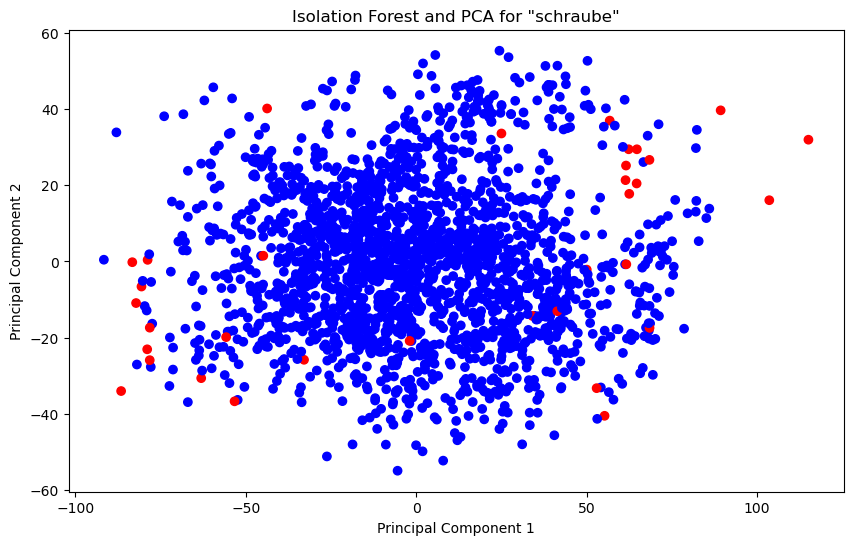

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sys.path.append('../../libs')
import dataset

# Load the full dataset
all_data = dataset.data()

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Standardizing the data for PCA and Isolation Forest
scaler = StandardScaler()

# Process each keyword
for word in keywords:
    # Extract data points for the word
    word_data_indices = [item['id'] for item in dataset.labels()[word]]
    word_features = np.array([all_data[index] for index in word_data_indices])

    # Reshape the features to 2D if necessary (e.g., Flatten the features)
    word_features = word_features.reshape(len(word_features), -1)

    # Standardize the features
    scaled_word_features = scaler.fit_transform(word_features)

    # Applying Isolation Forest for outlier detection
    iso_forest = IsolationForest(contamination='auto')
    outliers = iso_forest.fit_predict(scaled_word_features)

    # Applying PCA for 2D visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_word_features)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    colors = ['blue' if label == 1 else 'red' for label in outliers]
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color=colors)


    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Isolation Forest and PCA for "{word}"')
    plt.show()


Outliers for 'fernseher': [  70  191  192  267  409  808  809  810  901 1594 1902 1905]


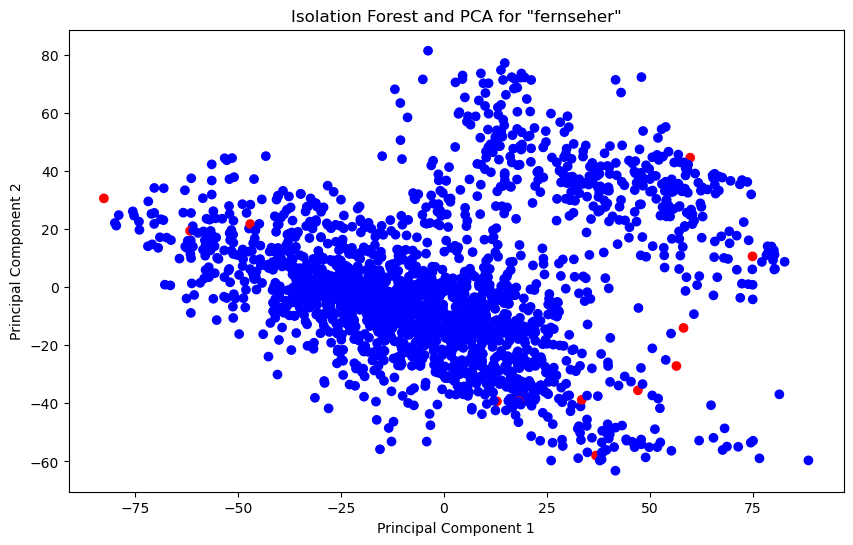

Outliers for 'heizung': [195 406 407 729 802 805]


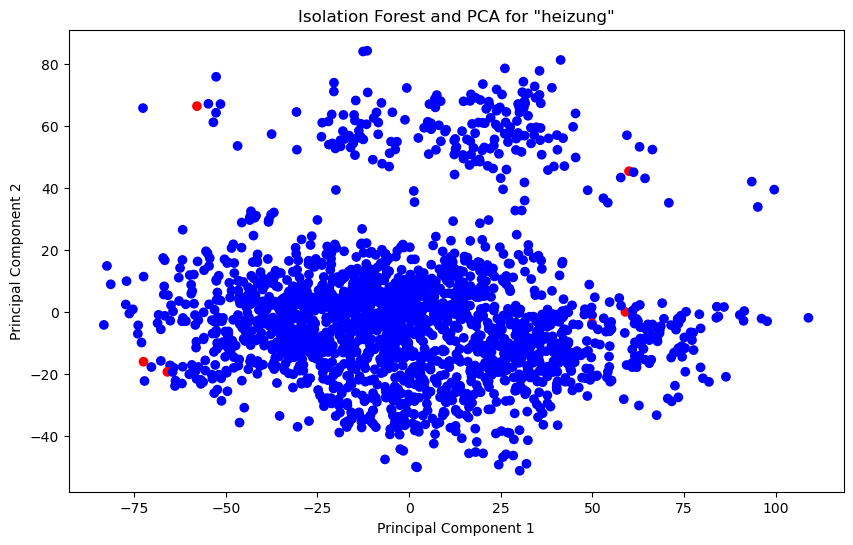

Outliers for 'licht': [  52   53   55  179  181  321  334  510  513  732  768  786  789  934
  978 1202 1203 1205 1292 1404 1405 1764 1765 1766 1784 1785 1786 1968]


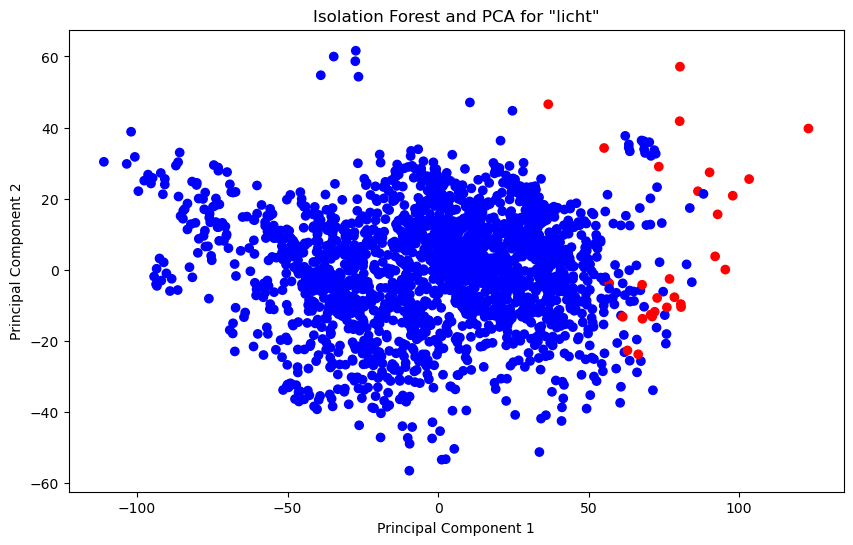

Outliers for 'lüftung': [ 218  232  290  321  322  731  784  804 1320 1709 1749 1750 1752 1766
 1800]


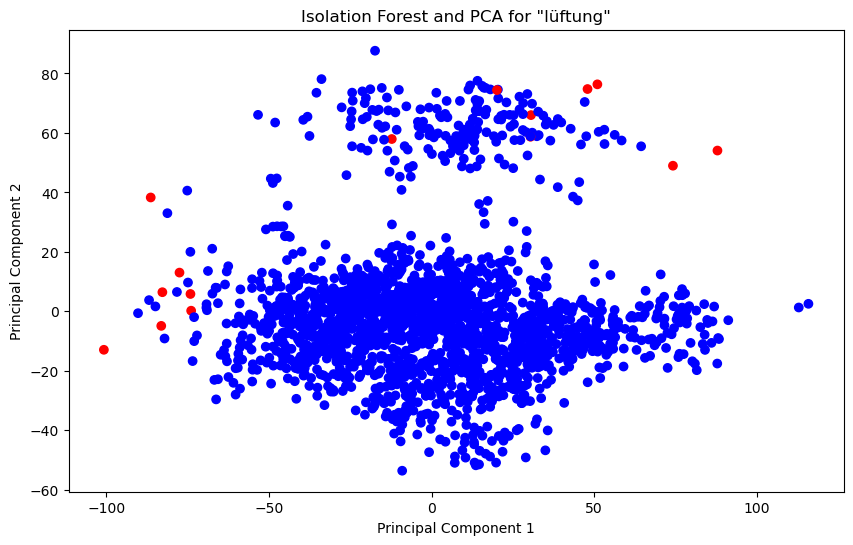

Outliers for 'ofen': [ 193  194  215  216  217  218  410  730  785  801  802  807  832  834
  835  935 1202 1291 1445 1453 1454 1455 1565 1634 1750 1751 1766 1900]


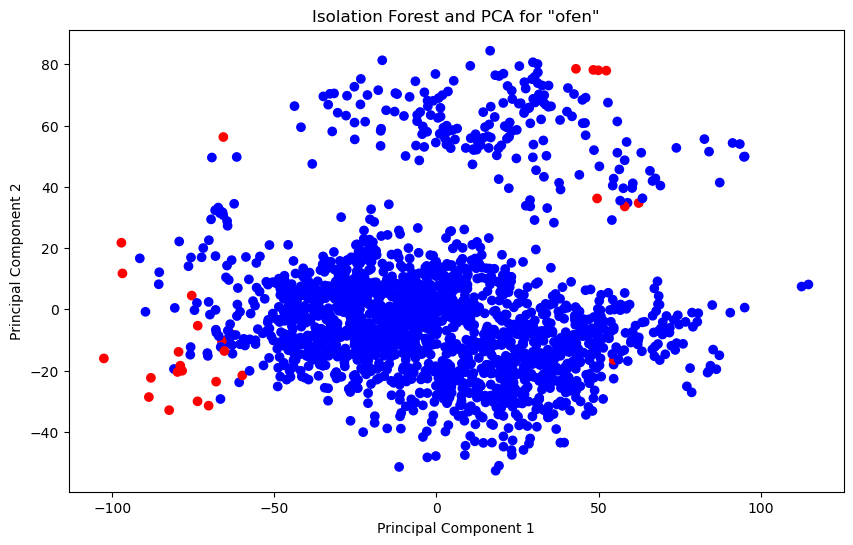

Outliers for 'alarm': [ 194  216  218  320  322  333  334  408  410  837  901  933 1201 1203
 1204 1632 1635 2028]


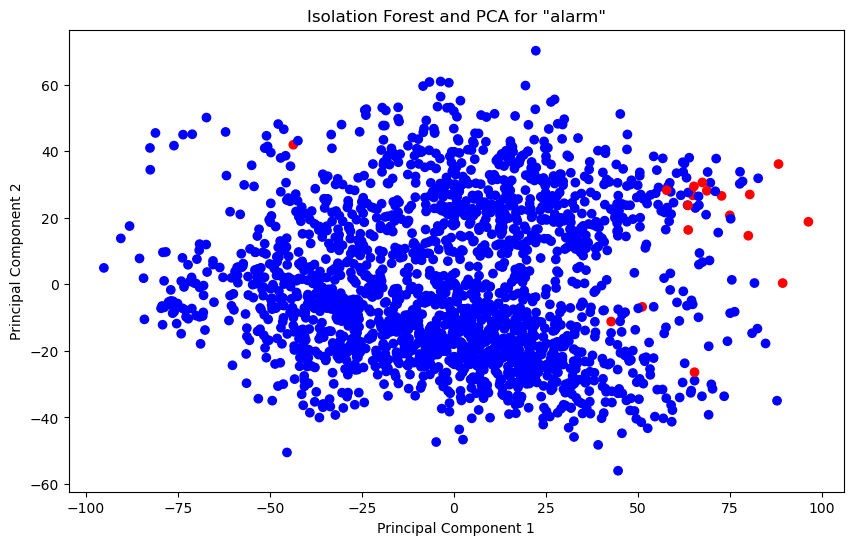

Outliers for 'radio': [  52  103  116  143  192  320  321  332  440  491  807  934  960  961
 1202 1392 1466 1634 1899 2002]


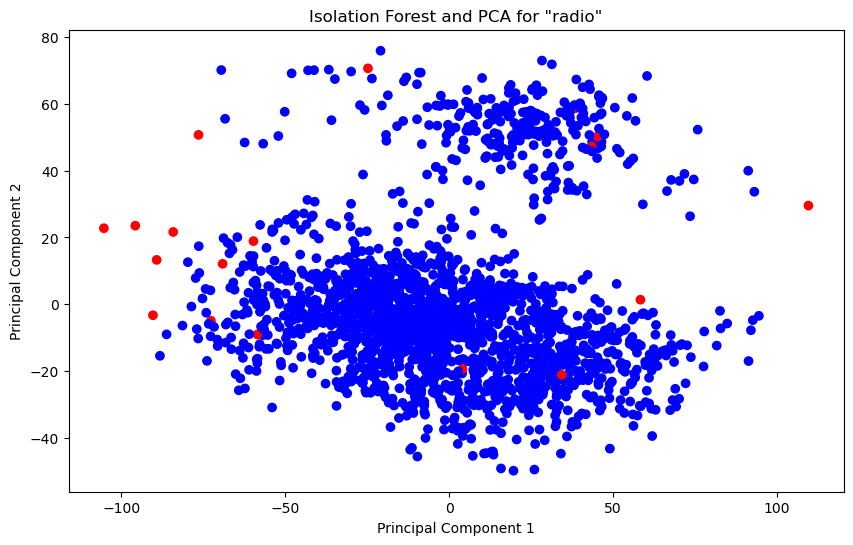

Outliers for 'staubsauger': [  67   68   70  116  191  194  291  704  803  805  824 1098 1199 1200
 1201 1202 1627 1894 1895 1896 1897 1934]


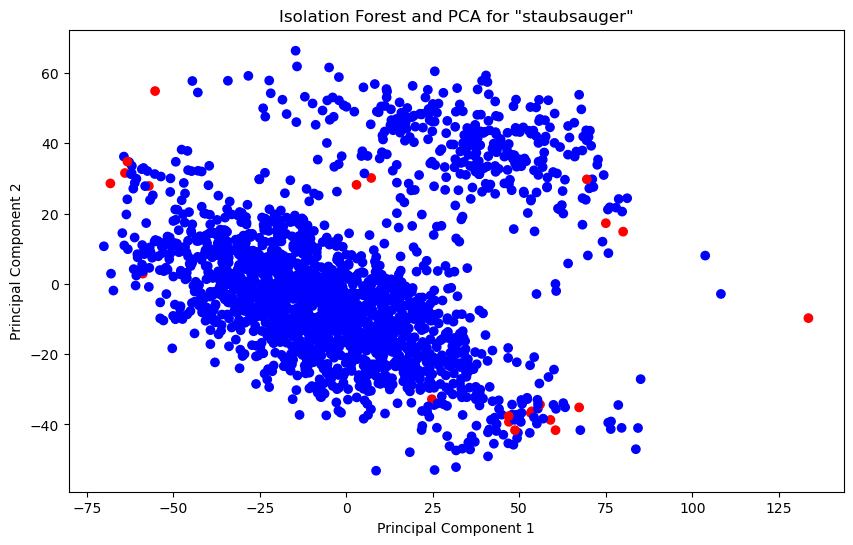

Outliers for 'an': [ 111  116  219  622  729 1761 1998 2021]


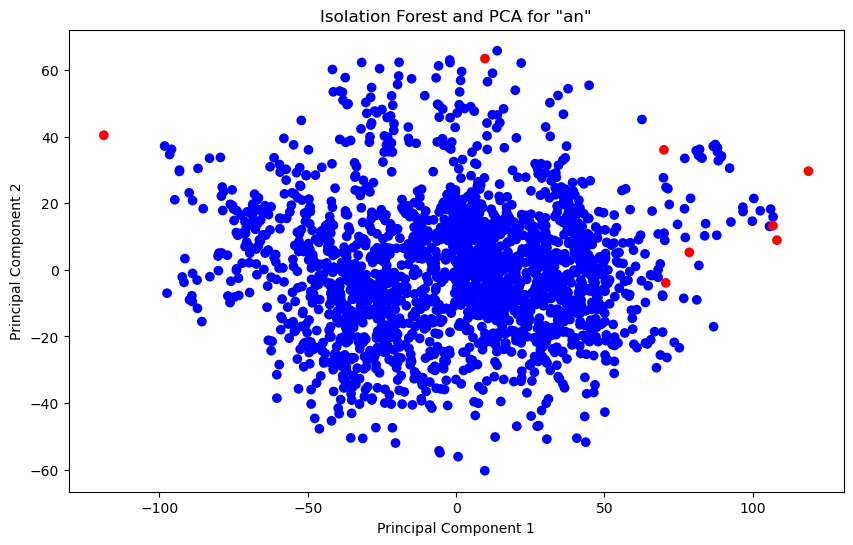

Outliers for 'aus': [  35   52   55  116  117  186  475  650  651  698  806 1131 1146 1368
 1380 1424 1721 1763 1998]


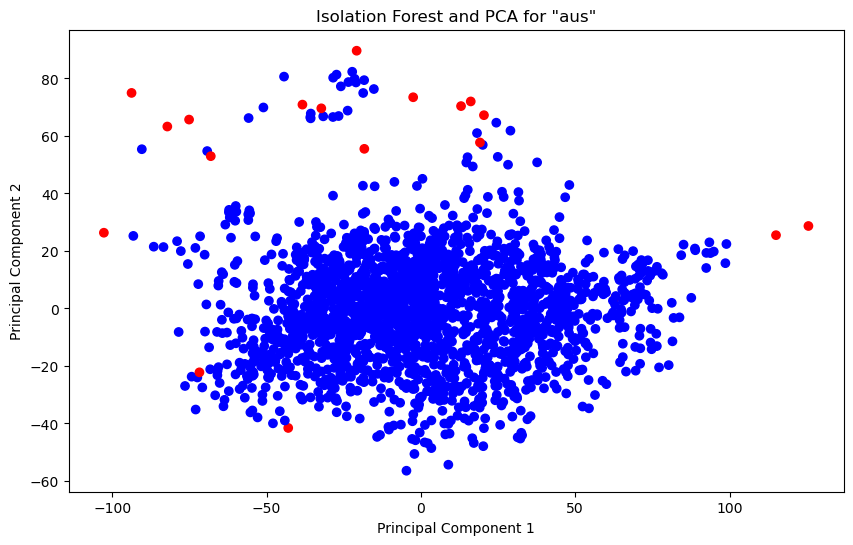

Outliers for 'brötchen': [  53   85  117  268  307  728  803  931  934  955  987 1198 1201]


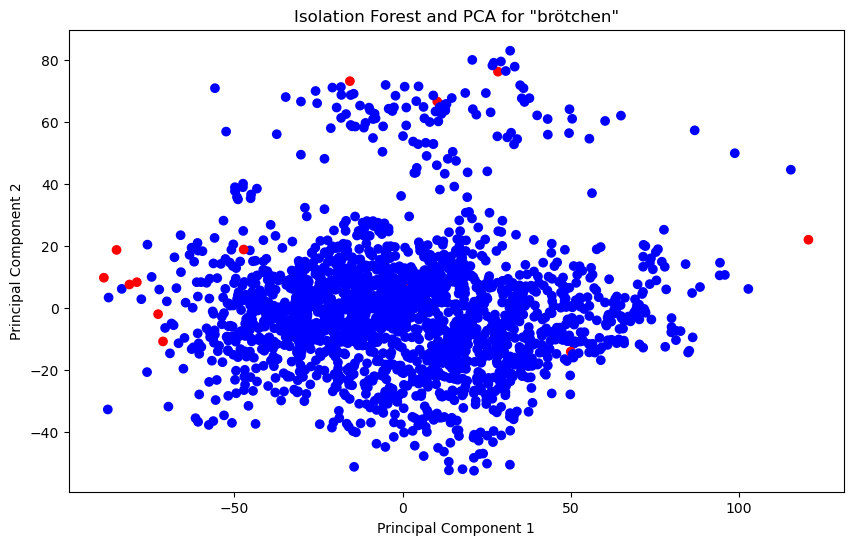

Outliers for 'spiegel': [  12   13  117  193  252  253  345  669  803  804  806  824  825 1017
 1211 1214 1256 1268 1402 1435 1761 1896 1897 1898 1899 1901 1902 1976
 2000]


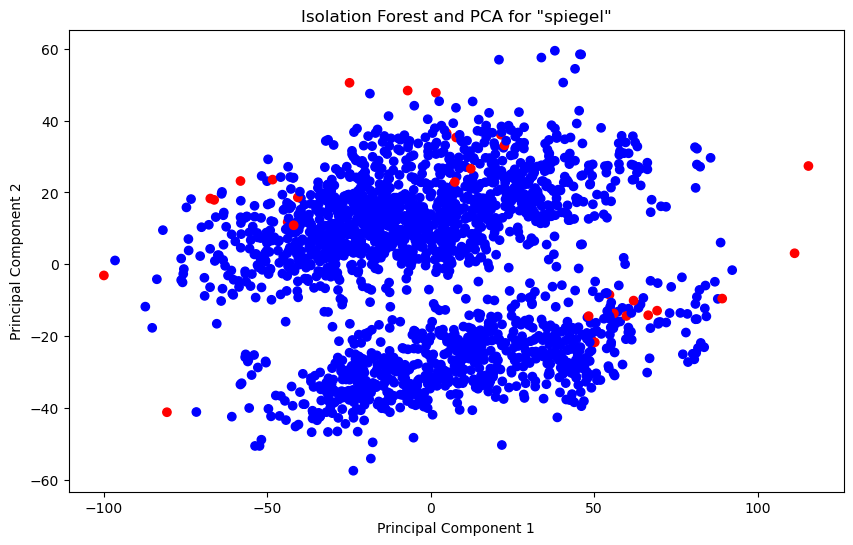

Outliers for 'wunderbar': [ 101  215  291  292  294  319  334  408  439  563 1097 1098 1099 1100
 1436 1794 1795 1898]


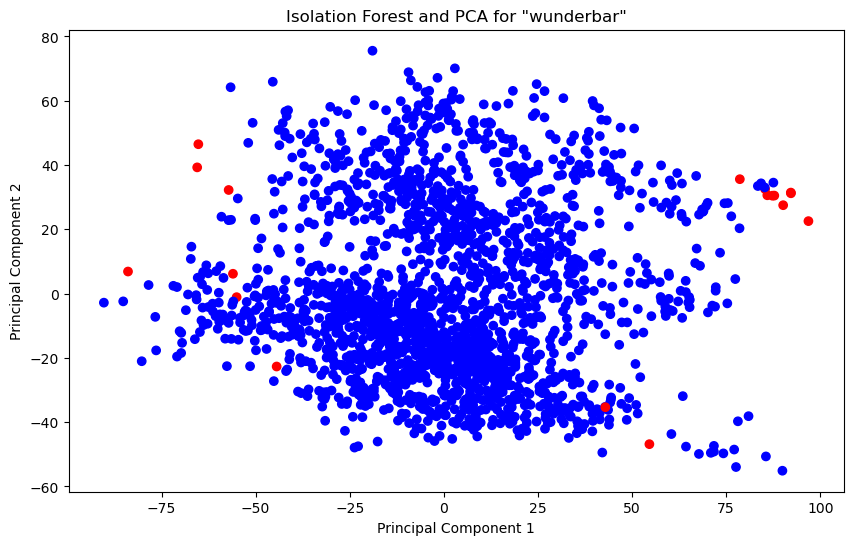

Outliers for 'kann': [ 116  117  184  564  621  622  729  792 1763]


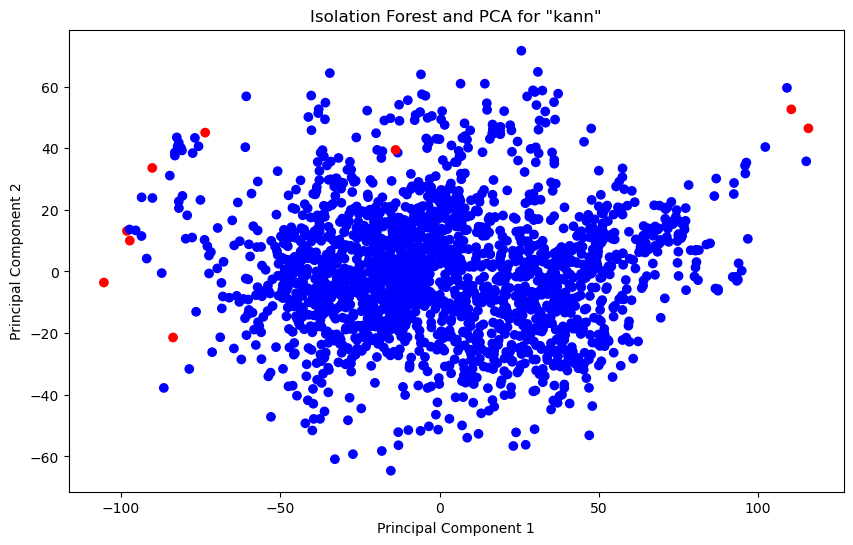

Outliers for 'haus': [ 117  118  194  195  255  322  409  476  478  562  563  650  672  806
  807 1017 1220 1391 1530 1654 1766 1898]


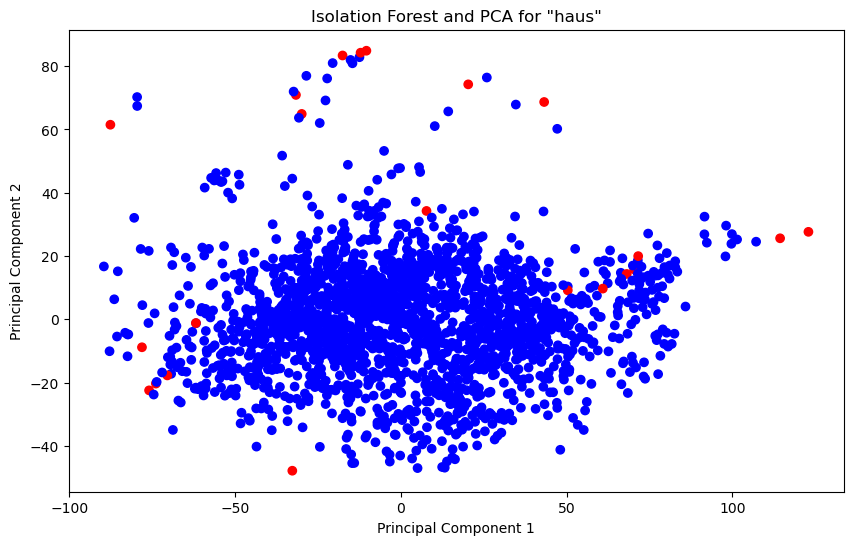

Outliers for 'nicht': [  55  103  116  117  194  218  333  730  731  769  788  789  899  979
 1390 1391 1406 1407 1766 1767 1768 1785]


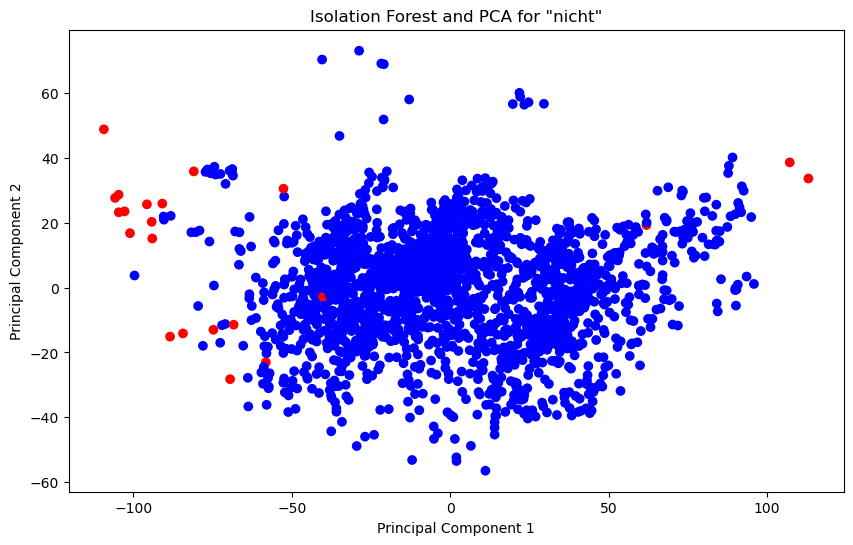

Outliers for 'warm': [ 117  118  193  216  405  739  896  971 1477 1898]


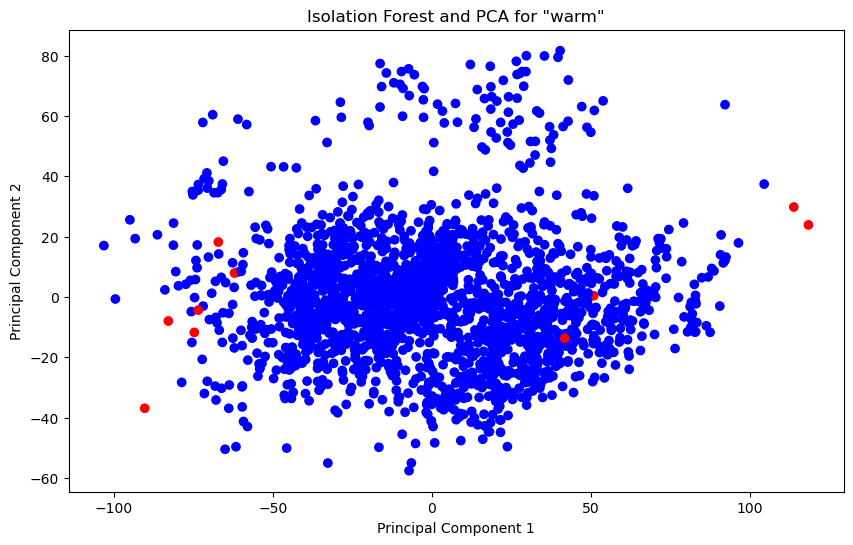

Outliers for 'offen': [ 139  481  785  806 1029 1373 1595 1732 2002 2024]


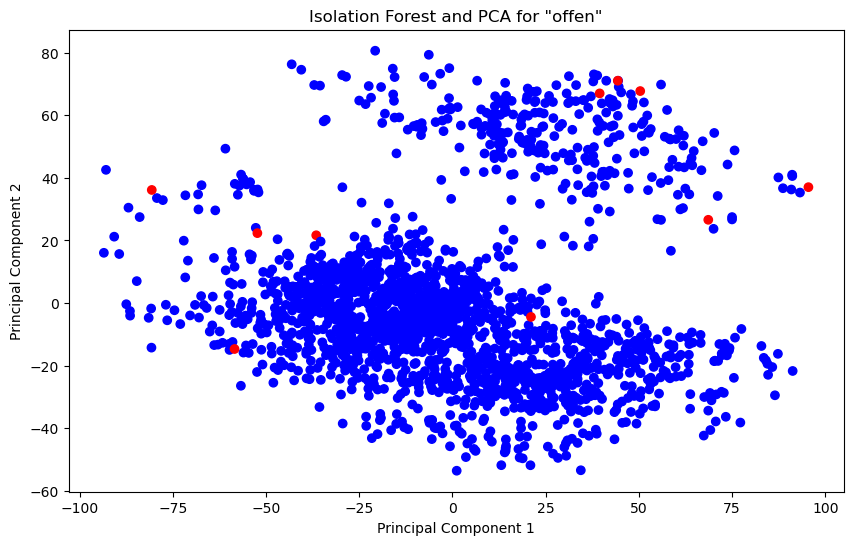

Outliers for 'leitung': [ 217  218  219  320  321  786  795  835  936 1203 1204 1205 1455 1633
 1741]


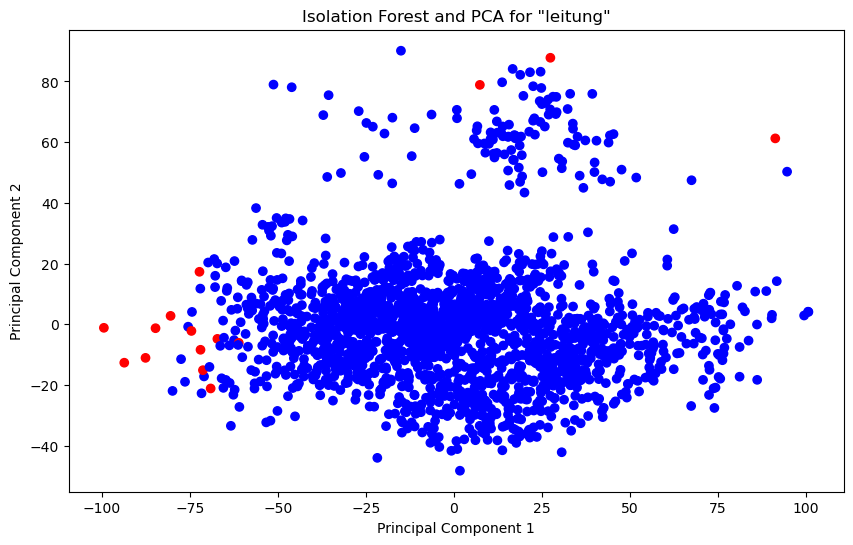

Outliers for 'schraube': [  55  117  118  192  194  195  321  322  323  409  410  411  808  810
  829 1204 1205 1739 1767 1902 1903 1904]


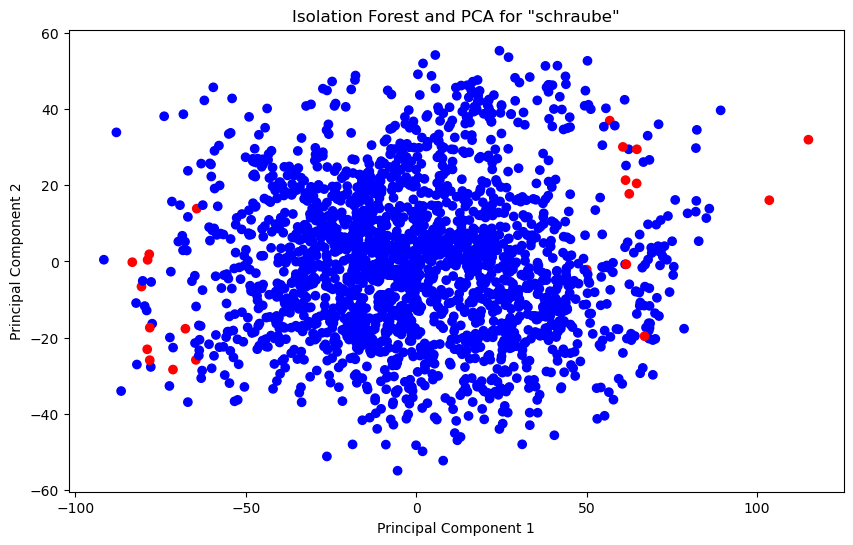

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sys.path.append('../../libs')
import dataset

# Load the full dataset
all_data = dataset.data()

# List of keywords
keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

# Standardizing the data for PCA and Isolation Forest
scaler = StandardScaler()

# Process each keyword
for word in keywords:
    # Extract data points for the word
    word_data_indices = [item['id'] for item in dataset.labels()[word]]
    word_features = np.array([all_data[index] for index in word_data_indices])
    word_features = word_features.reshape(len(word_features), -1)
    scaled_word_features = scaler.fit_transform(word_features)

    # Applying Isolation Forest for outlier detection
    iso_forest = IsolationForest(contamination='auto')
    outliers = iso_forest.fit_predict(scaled_word_features)

    # Identifying outlier indices
    outlier_indices = np.where(outliers == -1)[0]
    print(f"Outliers for '{word}': {outlier_indices}")

    # Applying PCA for 2D visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_word_features)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    colors = ['blue' if label == 1 else 'red' for label in outliers]
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color=colors)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Isolation Forest and PCA for "{word}"')

    # Save each plot as a PNG file
    plt.savefig(f'{word}_outliers.png')

    plt.show()


In [8]:
import sys
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sys.path.append('../../libs')
import dataset

all_data = dataset.data()

keywords = ["fernseher", "heizung", "licht", "lüftung", "ofen", 
            "alarm", "radio", "staubsauger", "an", "aus", 
            "brötchen", "spiegel", "wunderbar", "kann", 
            "haus", "nicht", "warm", "offen", "leitung", "schraube"]

scaler = StandardScaler()

# Dictionary to store outliers for each word
outliers_dict = {}

for word in keywords:
    word_data_indices = [item['id'] for item in dataset.labels()[word]]
    word_features = np.array([all_data[index] for index in word_data_indices])
    word_features = word_features.reshape(len(word_features), -1)
    scaled_word_features = scaler.fit_transform(word_features)

    iso_forest = IsolationForest(contamination='auto')
    outliers = iso_forest.fit_predict(scaled_word_features)

    outlier_indices = np.where(outliers == -1)[0]
    outliers_dict[word] = [word_data_indices[i] for i in outlier_indices]

    # Print the number of outliers and their indices
    print(f"Number of outliers found for '{word}': {len(outlier_indices)}")
    if len(outlier_indices) > 0:
        print(f"Indices of outliers for '{word}': {[word_data_indices[i] for i in outlier_indices]}")

# Save the outliers_dict for later use
# You can use a file, a database, or any other method to save this information
# Example: Saving as a numpy file
np.save('outliers_dict.npy', outliers_dict)


Number of outliers found for 'fernseher': 10
Indices of outliers for 'fernseher': [3833, 3877, 3885, 8139, 10203, 16171, 18001, 31825, 37968, 38607]
Number of outliers found for 'heizung': 11
Indices of outliers for 'heizung': [670, 2689, 3889, 4359, 4367, 6435, 13443, 14657, 31556, 35245, 38015]
Number of outliers found for 'licht': 12
Indices of outliers for 'licht': [1049, 2326, 6688, 10272, 14609, 17986, 24022, 28071, 34370, 35268, 35300, 37962]
Number of outliers found for 'lüftung': 21
Indices of outliers for 'lüftung': [1072, 3683, 4321, 4335, 4339, 4641, 5770, 6403, 6407, 8163, 8167, 14581, 16020, 16052, 24007, 24043, 24082, 25802, 26362, 34160, 35958]
Number of outliers found for 'ofen': 17
Indices of outliers for 'ofen': [4312, 14606, 15723, 16042, 16045, 16125, 16684, 19934, 19986, 29092, 31294, 31965, 34773, 34967, 34988, 35287, 35308]
Number of outliers found for 'alarm': 14
Indices of outliers for 'alarm': [3886, 4364, 4366, 6672, 8831, 13913, 16104, 16711, 16722, 16724, 